Projekt MNwS - Aleksander Folfas 411052

In [21]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chisquare

Zadanie 4

Za pomocą odpowiednich symulacji zbadać wpływ liczby klas (na które dzielone są dane) odsetek
odrzuceń prawdziwej hipotezy głównej (tzn. błąd I rodzaju) w teście 𝜒2 w przypadku weryfikacji
zgodności z rozkładem 𝜒2 o różnych stopniach swobody, tzn. generować dane pochodzące z rozkładu
𝜒2 o 𝑘 stopniach swobody i weryfikować hipotezę, że dane mają rozkład 𝜒2 o 𝑘 st. swobody.
Uzyskane wyniki należy przedstawić na odpowiednich wykresach ilustrujących rozmiary testów z
uwzględnieniem:
- liczby danych,
- liczby klas,
- liczby stopni swobody generowanego rozkładu.

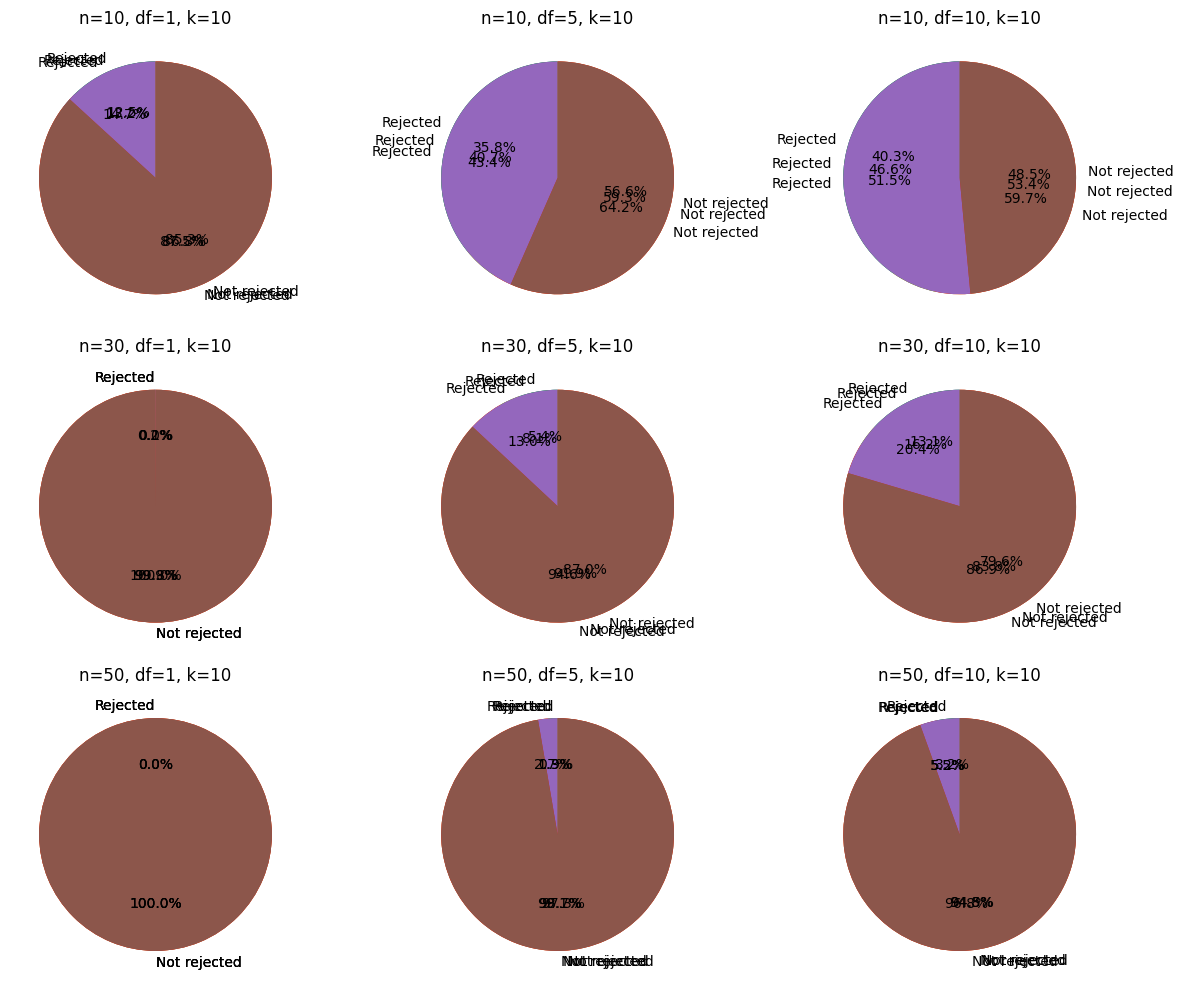

In [22]:
# ustalenie parametrów symulacji
np.random.seed(seed=411052)
n_repeats = 1000  # liczba powtórzeń symulacji dla każdej kombinacji parametrów
n_values = [10, 30, 50]  # liczby elementów w próbkach
df_values = [1, 5, 10]  # liczby stopni swobody
k_values = [2, 5, 10]  # liczby klas

fig, axs = plt.subplots(len(n_values), len(df_values), figsize=(12, 10))

# funkcja obliczająca odsetek odrzuceń hipotezy głównej
def compute_rejection_rate(data, k):
    obs_freq, bins = np.histogram(data, bins=k)
    exp_freq = np.ones_like(obs_freq) * len(data) / k
    _, p_value = chisquare(obs_freq, exp_freq)
    return p_value

# pętle wykonujące symulację
for i,n in enumerate(n_values):
    for j,df in enumerate(df_values):
        for k in k_values:
            rejection_rates = []
            for _ in range(n_repeats):
                # generowanie próbki danych z rozkładu chi2
                data = np.random.chisquare(df, size=n)

                # obliczenie odsetka odrzuceń hipotezy głównej
                rejection_rate = compute_rejection_rate(data, k)
                rejection_rates.append(rejection_rate)

            # obliczenie średniego odsetka odrzuceń hipotezy głównej
            mean_rejection_rate = np.mean(rejection_rates)

            # wizualizacja rozkładu odsetków odrzuceń hipotezy głównej
            axs[i,j].pie([mean_rejection_rate, 1-mean_rejection_rate], 
                         labels=['Rejected', 'Not rejected'], 
                         autopct='%1.1f%%', startangle=90)
            axs[i,j].set_title(f'n={n}, df={df}, k={k}')
plt.tight_layout()
plt.show()
